In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Loading training and test data
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 73896479.59it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 37526547.03it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 47300759.84it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3883108.19it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# DataLoader
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
# Custom Logistic Regression model
class LogisticRegression(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

# Instantiate the model
n_inputs = 28*28 # 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [5]:
# Defining the loss function
criterion = torch.nn.CrossEntropyLoss()

In [6]:
# List of optimizers to test
optimizers = {
    'SGD': torch.optim.SGD(log_regr.parameters(), lr=0.001),
    'Momentum': torch.optim.SGD(log_regr.parameters(), lr=0.001, momentum=0.9),
    'AdaGrad': torch.optim.Adagrad(log_regr.parameters(), lr=0.001),
    'Adam': torch.optim.Adam(log_regr.parameters(), lr=0.001)
}

In [7]:
# Train the model with different optimizers
epochs = 50

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer")

    Loss = []
    acc = []

    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = log_regr(images.view(-1, 28*28))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        Loss.append(loss.item())
        correct = 0

        for images, labels in test_loader:
            outputs = log_regr(images.view(-1, 28*28))
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum()

        accuracy = 100 * (correct.item()) / len(test_dataset)
        acc.append(accuracy)
        print(f'Epoch: {epoch}. Loss: {loss.item()}. Accuracy: {accuracy}%')


Training with SGD optimizer
Epoch: 0. Loss: 2.1918063163757324. Accuracy: 64.76%
Epoch: 1. Loss: 2.1053006649017334. Accuracy: 75.3%
Epoch: 2. Loss: 2.0348498821258545. Accuracy: 78.39%
Epoch: 3. Loss: 2.0013513565063477. Accuracy: 79.95%
Epoch: 4. Loss: 1.9773964881896973. Accuracy: 80.84%
Epoch: 5. Loss: 1.9273028373718262. Accuracy: 81.43%
Epoch: 6. Loss: 1.9530742168426514. Accuracy: 81.95%
Epoch: 7. Loss: 1.8481284379959106. Accuracy: 82.27%
Epoch: 8. Loss: 1.8527781963348389. Accuracy: 82.62%
Epoch: 9. Loss: 1.847160816192627. Accuracy: 82.9%
Epoch: 10. Loss: 1.8505403995513916. Accuracy: 83.13%
Epoch: 11. Loss: 1.796371579170227. Accuracy: 83.41%
Epoch: 12. Loss: 1.7710593938827515. Accuracy: 83.55%
Epoch: 13. Loss: 1.8304376602172852. Accuracy: 83.75%
Epoch: 14. Loss: 1.746006965637207. Accuracy: 83.85%
Epoch: 15. Loss: 1.7822597026824951. Accuracy: 84.0%
Epoch: 16. Loss: 1.7820839881896973. Accuracy: 84.18%
Epoch: 17. Loss: 1.8067660331726074. Accuracy: 84.23%
Epoch: 18. Loss

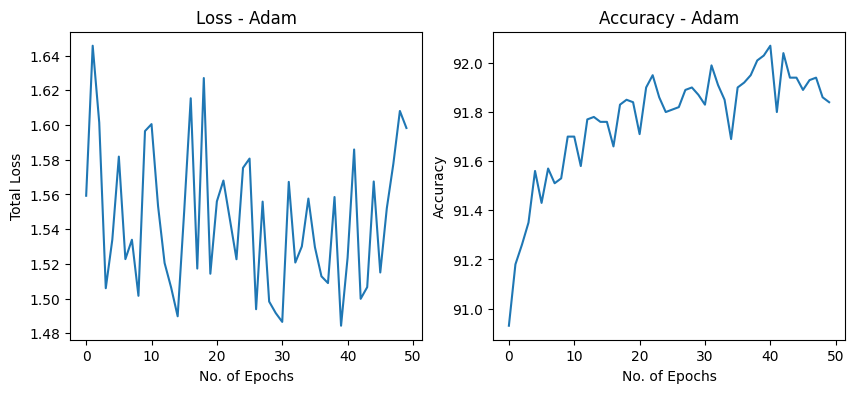

In [16]:
 # Plotting loss and accuracy for the current optimizer
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(Loss)
plt.xlabel("No. of Epochs")
plt.ylabel("Total Loss")
plt.title(f"Loss - {opt_name}")

plt.subplot(1, 2, 2)
plt.plot(acc)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title(f"Accuracy - {opt_name}")

plt.show()